1.라이브러리 설치

In [39]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
%pip install torchvision
%pip install torchinfo
%pip install pytorchcv

--2024-04-23 17:14:22--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.39K  --.-KB/s    in 0.001s  

2024-04-23 17:14:23 (7.89 MB/s) - ‘pytorchcv.py’ saved [6540/6540]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 10.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
import torch
import torchvision
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pytorchcv
import torchvision.transforms as transforms


Number of training samples: 60000
Number of test samples: 10000
Shape of image tensor: torch.Size([64, 1, 28, 28])
Labels: tensor([9, 0, 6, 7, 5, 6, 0, 0, 2, 1, 4, 0, 4, 6, 5, 6, 3, 7, 0, 3, 0, 5, 9, 3,
        6, 3, 7, 5, 1, 8, 5, 3, 6, 8, 5, 4, 2, 3, 2, 8, 8, 9, 0, 8, 1, 7, 0, 8,
        6, 2, 6, 8, 4, 4, 8, 4, 6, 5, 1, 2, 0, 3, 5, 3])


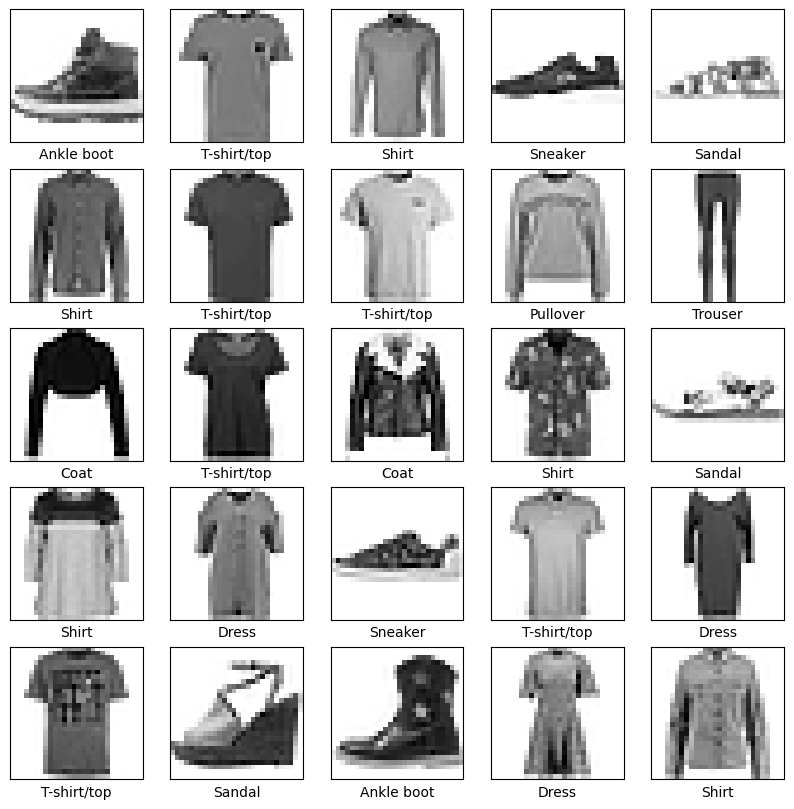

In [34]:
# Fashion-MNIST 데이터셋을 로드하는 함수 정의
def load_fashion_mnist(batch_size=64):
    # Fashion-MNIST 데이터셋을 './data' 디렉토리에 다운로드하고 로드
    data_train = torchvision.datasets.FashionMNIST('./data', download=True, train=True, transform=ToTensor())
    data_test = torchvision.datasets.FashionMNIST('./data', download=True, train=False, transform=ToTensor())
    
    # 훈련 데이터 로더 생성
    train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, shuffle=True)
    # 테스트 데이터 로더 생성
    test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

# Fashion-MNIST 데이터셋 로드
train_loader, test_loader = load_fashion_mnist()

# 데이터셋 탐색 및 분석
# 훈련 데이터셋의 크기 확인
num_train_samples = len(train_loader.dataset)
print("Number of training samples:", num_train_samples)

# 테스트 데이터셋의 크기 확인
num_test_samples = len(test_loader.dataset)
print("Number of test samples:", num_test_samples)

# 이미지 데이터의 형태 확인
sample_image, sample_label = next(iter(train_loader))
print("Shape of image tensor:", sample_image.shape)
print("Labels:", sample_label)

# 클래스 레이블 분석
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 랜덤 샘플 이미지와 레이블 시각화
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_image[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[sample_label[i]])
plt.show()


Epoch 1, Train Loss: 0.4447278234083007, Train Accuracy: 0.8445333333333334
Epoch 2, Train Loss: 0.31492444390713026, Train Accuracy: 0.8896833333333334
Epoch 3, Train Loss: 0.2841737332946456, Train Accuracy: 0.89955
Epoch 4, Train Loss: 0.26631862007732837, Train Accuracy: 0.9064166666666666
Epoch 5, Train Loss: 0.25125686925198476, Train Accuracy: 0.9107


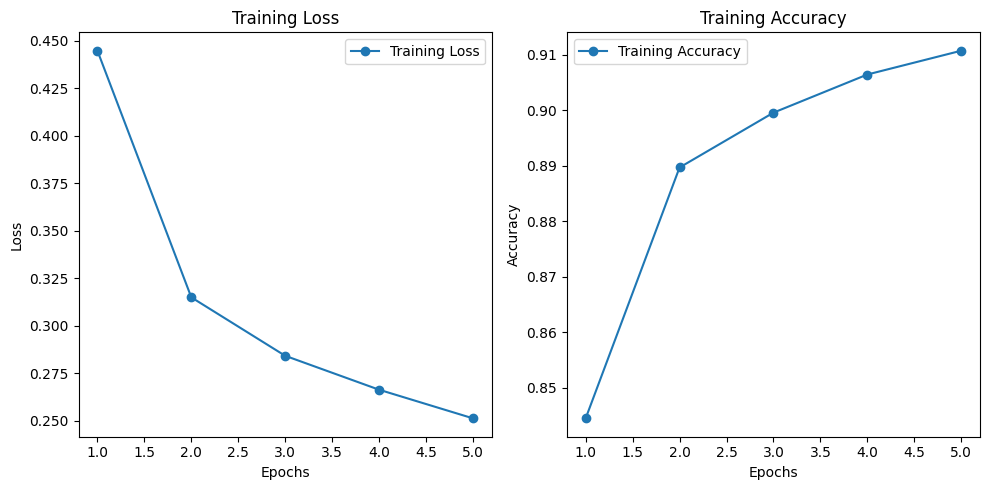

In [45]:
# 간단한 CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1) # 컨볼루션 레이어
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # 풀링 레이어
        self.fc = nn.Linear(16 * 14 * 14, 10) # 완전 연결된 레이어

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = x.view(-1, 16 * 14 * 14)
        x = self.fc(x)
        return x

# 신경망 모델 생성
model = SimpleCNN()
# 모델 컴파일
criterion = nn.CrossEntropyLoss() # 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001) # 최적화 알고리즘
#학습 및 검증 데이터에 대한 정확도와 손실을 시각화하는 Python 함수
#Matplotlib 라이브러리를 사용하여 결과를 그래프로 표시
def plot_training_results(train_losses, train_accuracies):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), train_losses, label='Training Loss', marker='o')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy', marker='o')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 훈련 함수 정의
def train_epoch(net, dataloader, optimizer, loss_fn):
    net.train()
    total_loss, acc, count = 0, 0, 0
    for features, labels in dataloader:
        optimizer.zero_grad()
        lbls = labels
        out = net(features)
        loss = loss_fn(out, lbls)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(out, 1)
        acc += (predicted == lbls).sum().item()
        count += len(labels)
    
    return total_loss / len(dataloader), acc / count


# 훈련
epochs = 5 # 에폭 수
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_acc}")
    
    # 손실과 정확도를 리스트에 저장
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

# 손실과 정확도 플롯
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', marker='o')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy', marker='o')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Test Accuracy: 0.8944, Test Loss: 0.29056605967176946


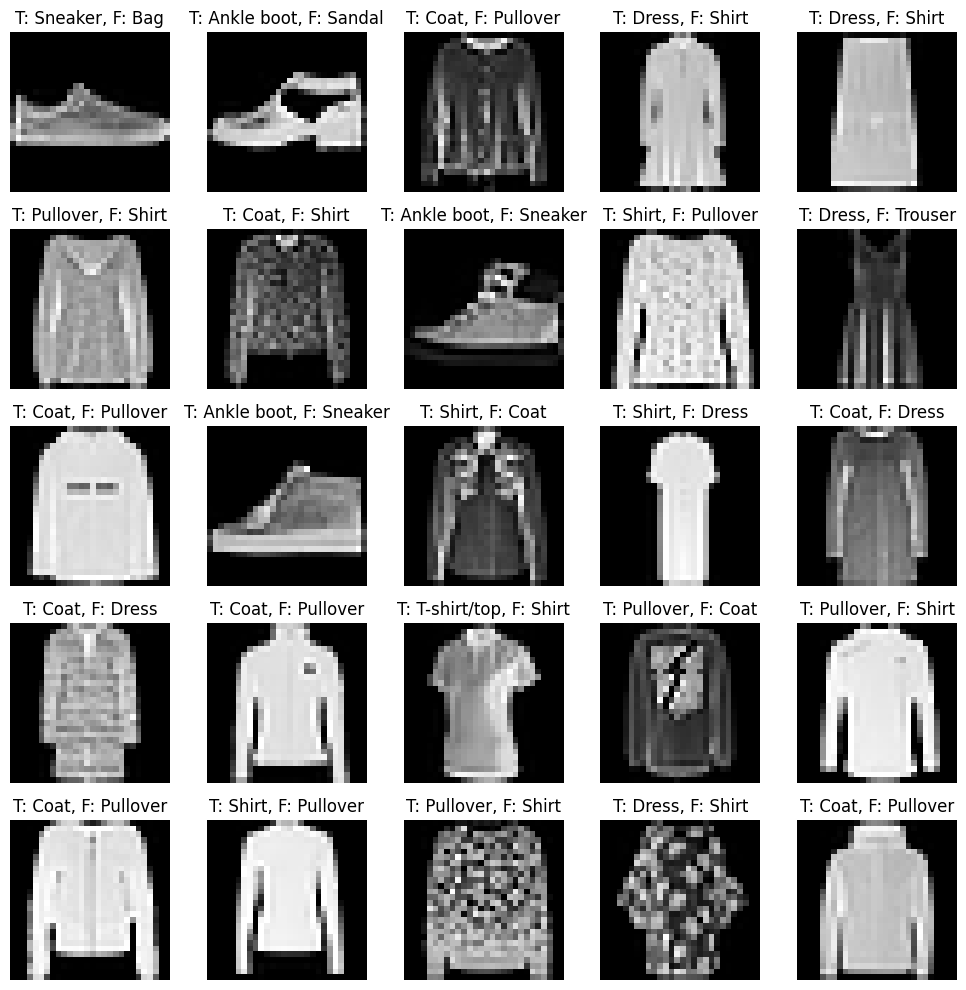

In [84]:
# 모델을 평가하는 함수 정의
def evaluate_model(net, dataloader, loss_fn):
    net.eval()  # 모델을 평가 모드로 설정
    total_loss, correct_pred, total_pred = 0, 0, 0
    misclassified_images = []  # 잘못 분류된 이미지들을 저장할 리스트

    with torch.no_grad():  # 그래디언트 계산 비활성화
        for features, labels in dataloader:
            features, labels = features.to(device), labels.to(device)
            outputs = net(features)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_pred += labels.size(0)
            correct_pred += (predicted == labels).sum().item()

            # 잘못 분류된 이미지 식별
            misclassified_indices = (predicted != labels).nonzero()[:, 0]
            for idx in misclassified_indices:
                misclassified_images.append({
                    'image': features[idx].cpu(),
                    'true_label': labels[idx].item(),
                    'predicted_label': predicted[idx].item()
                })

    accuracy = correct_pred / total_pred
    average_loss = total_loss / len(dataloader)
    return accuracy, average_loss, misclassified_images

# 모델 평가
test_accuracy, test_loss, misclassified_images = evaluate_model(model, test_loader, criterion)
print(f'Test Accuracy: {test_accuracy}, Test Loss: {test_loss}')

# 잘못 분류된 이미지 시각화
plt.figure(figsize=(10, 10))
for i, misclassified in enumerate(misclassified_images[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(misclassified['image'].permute(1, 2, 0).numpy().squeeze(), cmap='gray')
    plt.title(f'T: {class_names[misclassified["true_label"]]}, F: {class_names[misclassified["predicted_label"]] }')
    plt.axis('off')
plt.tight_layout()  # 이미지 간격 조정
plt.show()
